# **Praktikum 13 ML**

# ***Neural Network (Artificial Neural Network)***

* Import Library dasar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

* Load dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
titanic_data = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum13/data/titanic_data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Pemeriksaan missing values (data kosong)

In [21]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


* data cleaning

1.  menghapus kolom yang tidak digunakan



In [22]:
# drop kolom
titanic_data = titanic_data.drop(columns=['Cabin', 'Name', 'Ticket'], axis=1)

2.   Visualisasi distribusi dan outlier pada kolom age



<Axes: >

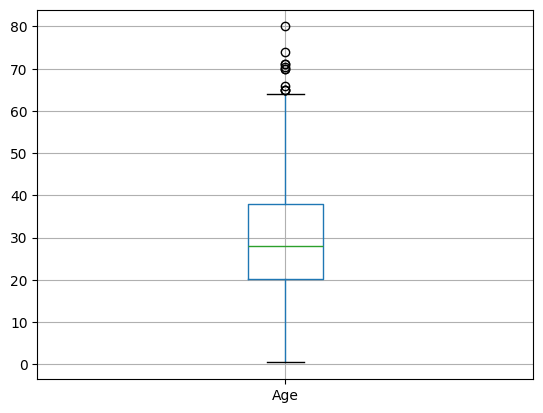

In [23]:
titanic_data.boxplot(column=['Age'])

3. Mengisi nilai kosong pada kolom age dengan median

In [24]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

/tmp/ipython-input-2129876400.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


4. mengisi nilai kosong pada kolom embarked dengan modus

In [25]:
# replacing the missing value in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-2042520238.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


5. Verifikasi ulang missing value

In [26]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


* Encoding data kategorikal

In [27]:
replacements = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2}
}

titanic_data.replace(replacements, inplace=True)

/tmp/ipython-input-3284127860.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace(replacements, inplace=True)


In [28]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


* Split data dan transformasi (scalling)

1. Split data variabel X dan Y

In [29]:
X = titanic_data.drop(columns=['Survived'], axis=1)
y = titanic_data['Survived']

2. Transformasi data

In [30]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

3. Train test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

* Modelling - menentukan stuktur input untuk neural network

In [32]:
X_train.shape

(712, 8)

* Pembuatan model Neural Network (arsitektur ANN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()

# hidden layer 1
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# dropout untuk mengurangin overfitting
model.add(Dropout(0.3))

# hidden layer 2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*  Kompilasi Model dan Ringkasan Arsitektur (Model Summary).

In [33]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

* Early Stopping (Pencegahan Overfitting Selama Training)


In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

* Training Model Neural Network

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.4328 - loss: 0.7770 - val_accuracy: 0.6643 - val_loss: 0.6707
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6001 - loss: 0.6731 - val_accuracy: 0.7762 - val_loss: 0.6440
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6679 - loss: 0.6594 - val_accuracy: 0.7692 - val_loss: 0.6177
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6397 - loss: 0.6570 - val_accuracy: 0.7902 - val_loss: 0.5949
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6986 - loss: 0.6214 - val_accuracy: 0.7832 - val_loss: 0.5719
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7081 - loss: 0.6176 - val_accuracy: 0.7832 - val_loss: 0.5473
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7329 - loss: 0.5815 - val_accuracy: 0.7832 - val_loss: 0.5263
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7468 - loss: 0.5730 - val_accuracy: 0.7762 - val_loss: 0.

* Evaluasi model (testing data)

In [37]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss : ", loss)
print("Test accuracy : ", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8168 - loss: 0.4020
Test loss :  0.411198228597641
Test accuracy :  0.8100558519363403


* Visualisasi Hasil Pelatihan (Accuracy dan Loss)


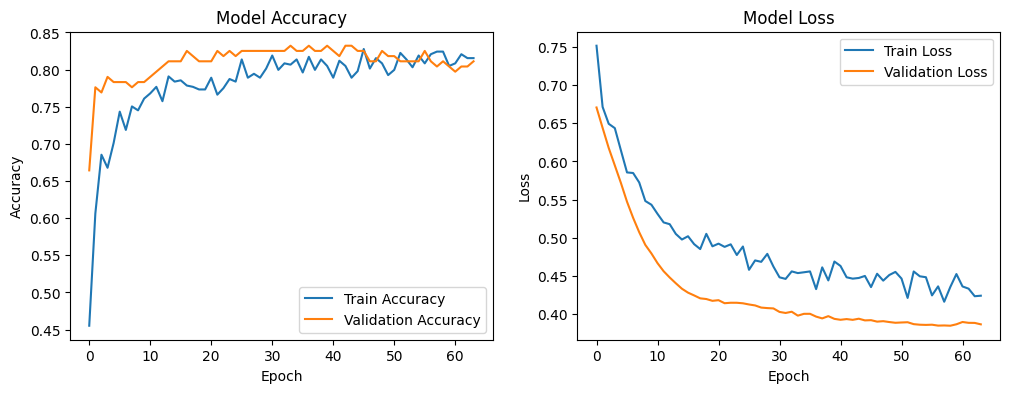

In [38]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Kesimpulan

Berdasarkan hasil praktikum Machine Learning – Neural Network (Artificial Neural Network) yang telah
dilakukan menggunakan dataset Titanic, dapat disimpulkan beberapa hal penting sebagai berikut:
1. Model Artificial Neural Network (ANN) berhasil dibangun menggunakan arsitektur berurutan
(Sequential Model) dengan dua hidden layer berukuran 32 dan 16 neuron serta fungsi aktivasi
ReLU, dan satu output layer dengan fungsi aktivasi Sigmoid untuk klasifikasi biner.
2. Model dikompilasi dengan optimizer Adam dan loss function Binary Crossentropy, serta
dievaluasi menggunakan akurasi (accuracy) sebagai metrik utama.
3. Untuk mencegah overfitting, digunakan teknik EarlyStopping dengan parameter
monitor='val_loss', patience=5, dan restore_best_weights=True, sehingga proses training
berhenti otomatis ketika performa model tidak membaik lagi.
4. Berdasarkan hasil evaluasi:
o Nilai Test Accuracy ≈ 0.80 (80%), menunjukkan model mampu memprediksi status
keselamatan penumpang dengan cukup baik.
o Nilai Test Loss ≈ 0.39, menunjukkan tingkat kesalahan prediksi yang rendah.
o Grafik accuracy dan loss menunjukkan tren stabil tanpa tanda overfitting, dengan
validation accuracy mendekati training accuracy.

# **Tugas Praktikum Mandiri 13**
**Jamilatun Khoerunnisa - 0110222254**

In [4]:
!pip install kaggle

* Mengambil API dari kaggle

In [5]:
kaggle = '/content/kaggle.json'

In [6]:
!mkdir -p ~/.kaggle
!cp "{kaggle}" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 740MB/s]


In [8]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = 'dataset'
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
    zip.extractall(extract_folder)
    print('Done')

Done


In [9]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [10]:
len(data_0)

2236

* Import Library

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

* Load Dataset & Konversi Gambar → Numerik

In [12]:
DATA_DIR = "/content/dataset"
IMG_SIZE = 28

X_list = []
y_list = []

for digit in range(10):
    folder = os.path.join(DATA_DIR, str(digit))
    for fname in os.listdir(folder):
        if not fname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp")):
            continue

        path = os.path.join(folder, fname)

        img = Image.open(path).convert("L").resize((IMG_SIZE, IMG_SIZE))
        arr = np.array(img, dtype=np.float32) / 255.0

        if arr.mean() > 0.5:
            arr = 1.0 - arr

        X_list.append(arr.reshape(-1))
        y_list.append(digit)

X = np.array(X_list, dtype=np.float32)
y = np.array(y_list, dtype=np.int64)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("X min/max/mean:", X.min(), X.max(), X.mean())

X shape: (21555, 784)
y shape: (21555,)
X min/max/mean: 0.0 1.0 0.051072657


* Visualisasi Hasil Preprocessing

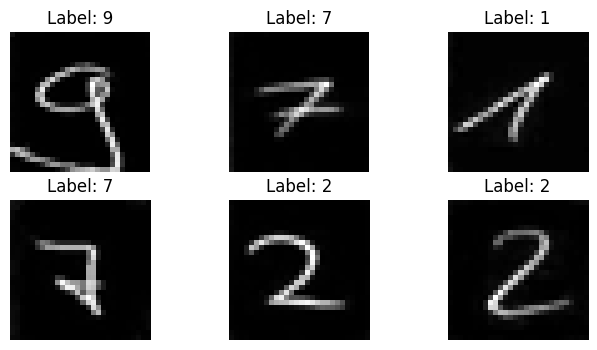

In [13]:
import random

plt.figure(figsize=(8,4))
for i in range(6):
    idx = random.randint(0, len(X)-1)
    plt.subplot(2,3,i+1)
    plt.imshow(X[idx].reshape(28,28), cmap="gray")
    plt.title(f"Label: {y[idx]}")
    plt.axis("off")
plt.show()

* Split Data Training & Testing

In [14]:
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y_train = to_categorical(y_train_raw, 10)
y_test  = to_categorical(y_test_raw, 10)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (17244, 784)
X_test : (4311, 784)
y_train: (17244, 10)
y_test : (4311, 10)


* Model MLP

In [15]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation="relu", input_shape=(784,)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

* Training

In [16]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.15,
    verbose=1
)

Epoch 1/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4272 - loss: 1.7573 - val_accuracy: 0.6842 - val_loss: 1.0464
Epoch 2/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7407 - loss: 0.8739 - val_accuracy: 0.8129 - val_loss: 0.6436
Epoch 3/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8665 - loss: 0.4833 - val_accuracy: 0.8465 - val_loss: 0.5039
Epoch 4/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9156 - loss: 0.3117 - val_accuracy: 0.8674 - val_loss: 0.4313
Epoch 5/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9467 - loss: 0.2098 - val_accuracy: 0.8705 - val_loss: 0.4139
Epoch 6/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1458 - val_accuracy: 0.8767 - val_loss: 0.4147
Epoch 7/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.1050 - val_accuracy: 0.8744 - val_loss: 0.4356
Epoch 8/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9837 - loss: 0.0821 - val_accuracy: 0

* Evaluasi (loss & accuracy)

In [17]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

Test Loss: 0.5545
Test Accuracy: 0.9033


* Classification report + Confusion matrix

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       447
           1       0.91      0.95      0.93       448
           2       0.95      0.92      0.93       447
           3       0.90      0.89      0.89       441
           4       0.92      0.87      0.90       436
           5       0.90      0.88      0.89       425
           6       0.89      0.93      0.91       424
           7       0.93      0.91      0.92       423
           8       0.86      0.87      0.87       417
           9       0.81      0.87      0.84       403

    accuracy                           0.90      4311
   macro avg       0.90      0.90      0.90      4311
weighted avg       0.90      0.90      0.90      4311



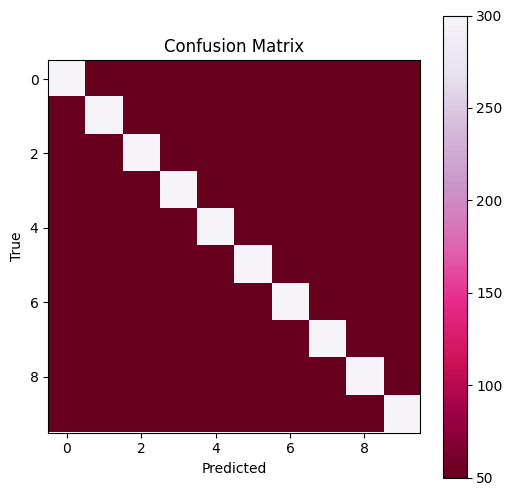

In [18]:
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)

print(classification_report(y_test_raw, y_pred))

cm = confusion_matrix(y_test_raw, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='PuRd_r', vmin=50, vmax=300)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()

* Visualisasi Accuracy & Loss


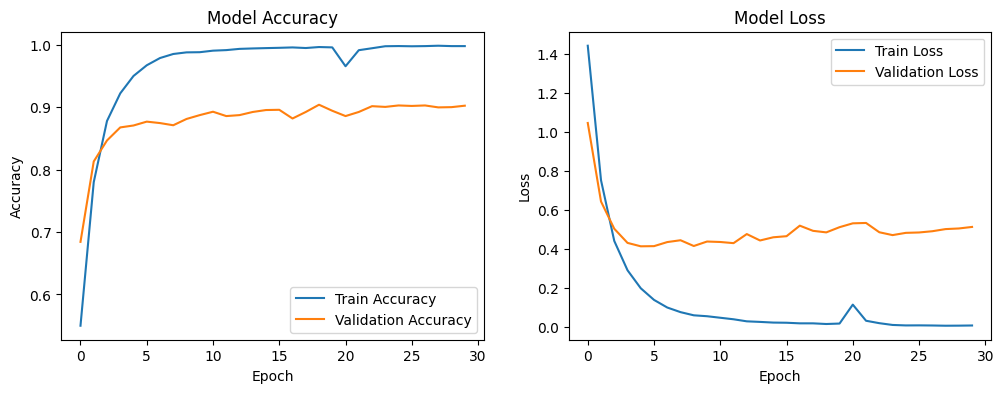

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email "jamilatunnisa996@gmail.com"
!git config --global user.name "Jamilatun Khoerunnisa"

!git clone https://github.com/Jamilatun/ti03_Mila_01101222254.git
%cd ti03_Mila_01101222254

!cp -r /content/drive/MyDrive/praktikum_ml/praktikum13/ ./praktikum13

!ls -lah

!git add .
!git commit -m "Upload folder praktikum13 dari Colab"

from getpass import getpass
import os

token = getpass("Masukkan GitHub Token: ")

os.system(f'git remote set-url origin https://{token}@github.com/Jamilatun/ti03_Mila_01101222254.git')

!git push origin main